# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Akhil Morampudi </font>

# I. Introduction

The objective of this assignment is to get familiar with the various classification algorithms such as Pocket, LDA, QDA, Logistic Regression, implement those algorithms,analysis of the accuracies & comparision among the algorithms. To perform this analysis I am using a classification dataset from UCI Repository called "online_shoppers_intention". The class label in this dataset is "Revenue"(Whether the particular session from user will generate revenue or not), as part of the experiment i am visualizing the data, pre-process it, divide the dataset into train and test, implement the algorithms, train the model with train data and test using test data, evaluation metrics for comparing the performance of various models. 

# II. Data

## Data Description
### Source of the Data:  
https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset    
  
  
 <font color='blue'>DataSet Name : online_shoppers_intention</font>  
#### DataSet information   
- The dataset consists of feature vectors belonging to 12,330 sessions.     
- The dataset consists of 18 attributes.
- The dataset contains the information of each session which belong to a different user in a 1-year period.  

<b>Highlights:</b>  
- The dataset consists of 10 numerical and 8 categorical attributes. 
- The 'Revenue' attribute can be used as the class label.   
  
<b> Attribute description </b>  
- <b>"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" </b> represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.  
- The <b> "Bounce Rate", "Exit Rate" and "Page Value" </b> features represent the metrics measured by <b>"Google Analytics"</b> for each page in the e-commerce site.  
  - The value of <b>"Bounce Rate"</b> feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.  
  - The value of <b>"Exit Rate"</b> feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.  
  - The <b>"Page Value"</b> feature represents the average value for a web page that a user visited before completing an e-commerce transaction.  
- The <b>"Special Day"</b> feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.  
  - The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.  
  - For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.  
- The dataset also includes <b>operating system, browser, region, traffic type, visitor type </b> as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


## Reading the Data

In [1]:
# Importing the libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading the data
df = pd.read_csv('online_shoppers_intention.csv')
pd.set_option('display.max_columns',None)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
# Missing Values:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
df["Revenue"].unique()

array([False,  True])

In [8]:
df.Weekend = df.Weekend.astype(int)
df.Revenue = df.Revenue.astype(int)

In [9]:
df["Revenue"].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

## Data Visualization

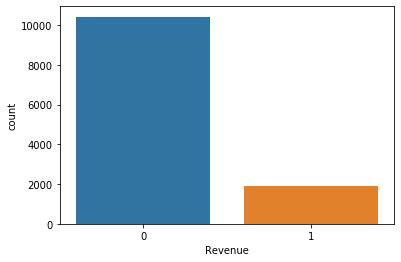

In [10]:
#Target Variable Distribution
sns.countplot(x="Revenue", data=df)

In [11]:
print("There are {}% target values with 1".format(100 * df["Revenue"].value_counts()[1]/df.shape[0]))

There are 15.474452554744525% target values with 1


<b>Observation:</b>     
Conversion rate of revenue column is very less. Out of ~12000 sessions only ~2000 sessions generated the revenue.   

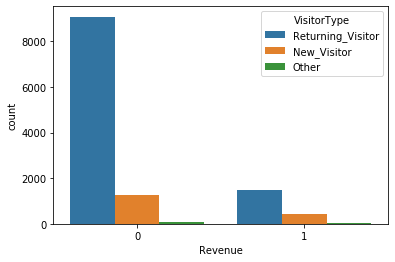

In [12]:
#VisitorType distribution in the revenue values
sns.countplot(x = 'Revenue', hue = 'VisitorType', data = df)

<b>Observation: </b>    
- By looking at the above plot it clearly depicts that the revenue generated by the Returning_Visitor users is more than the New_Visitor users.  
- Also, it says Returning_Visitor traffic is more than the New_visitor traffic.
- This might be because the website promotion has not been proper.By increasing the advertisement the site will get more traffic from the new_visitor 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtypes: flo

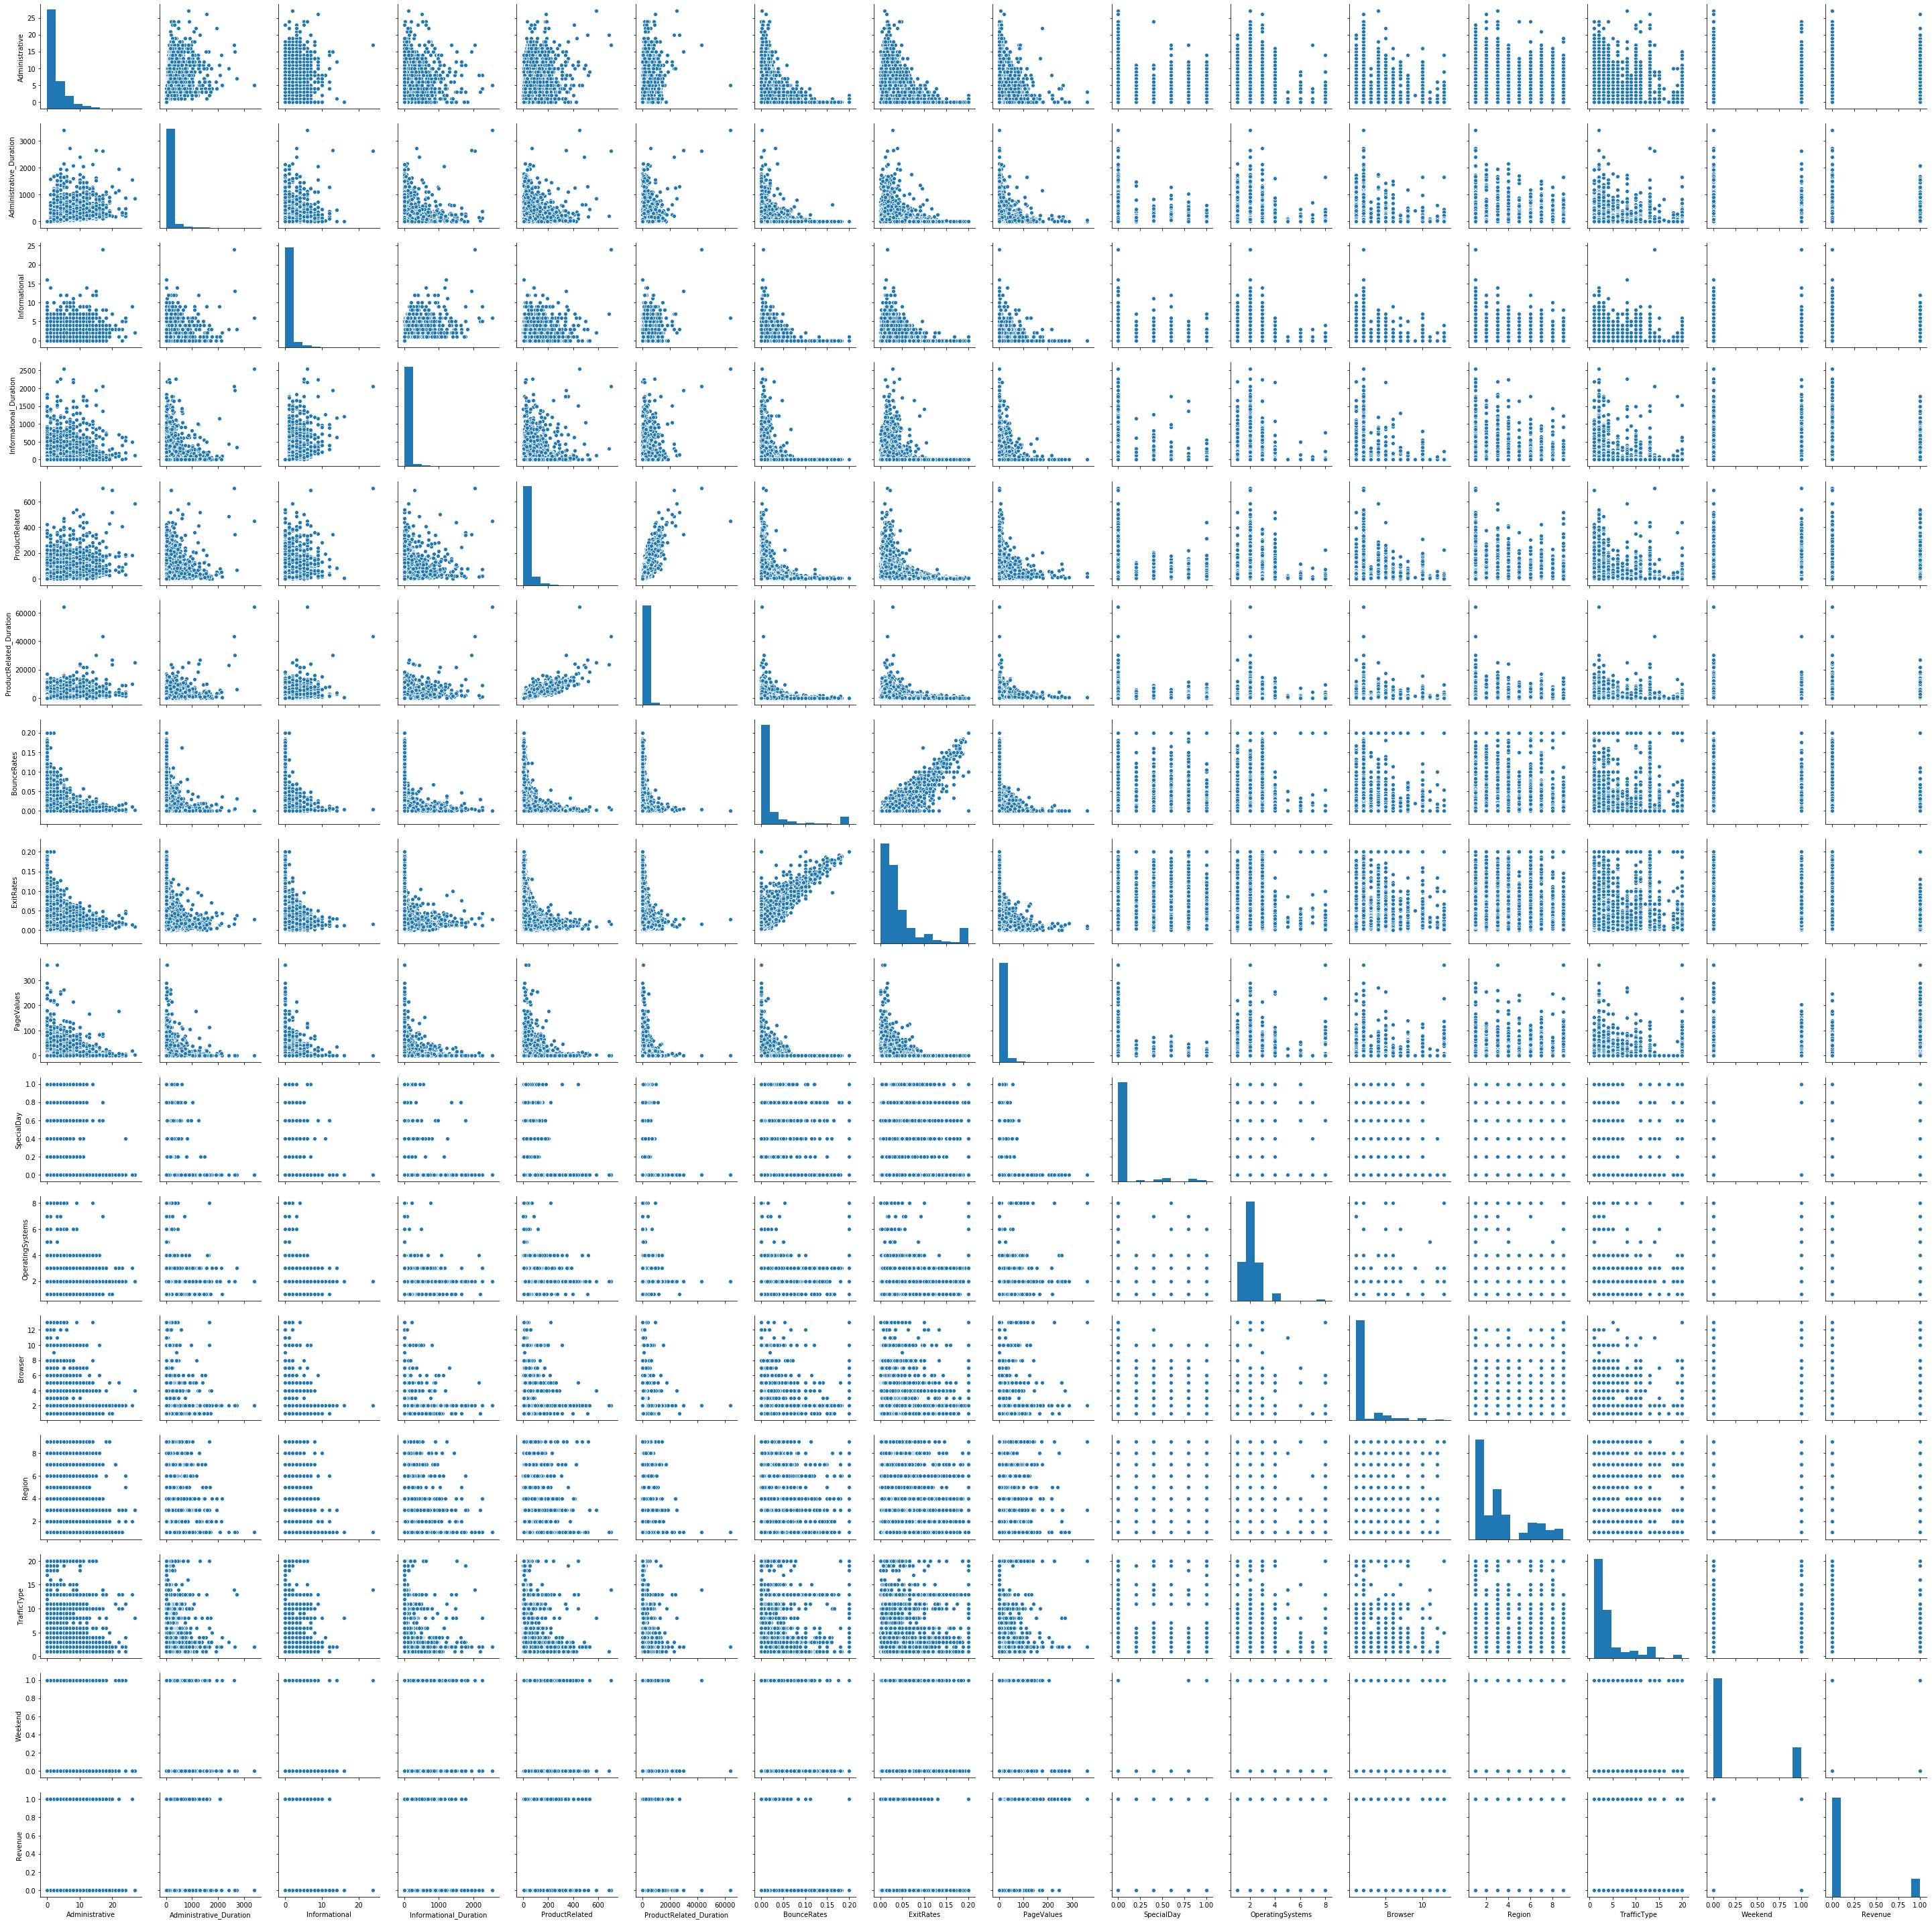

In [14]:
sns.pairplot(df)

<b>Observation:</b>
- From the above plot, it can be inferred that the Bounce rate & Exit rate are positively correlated strongly. So we can drop one column among the two.

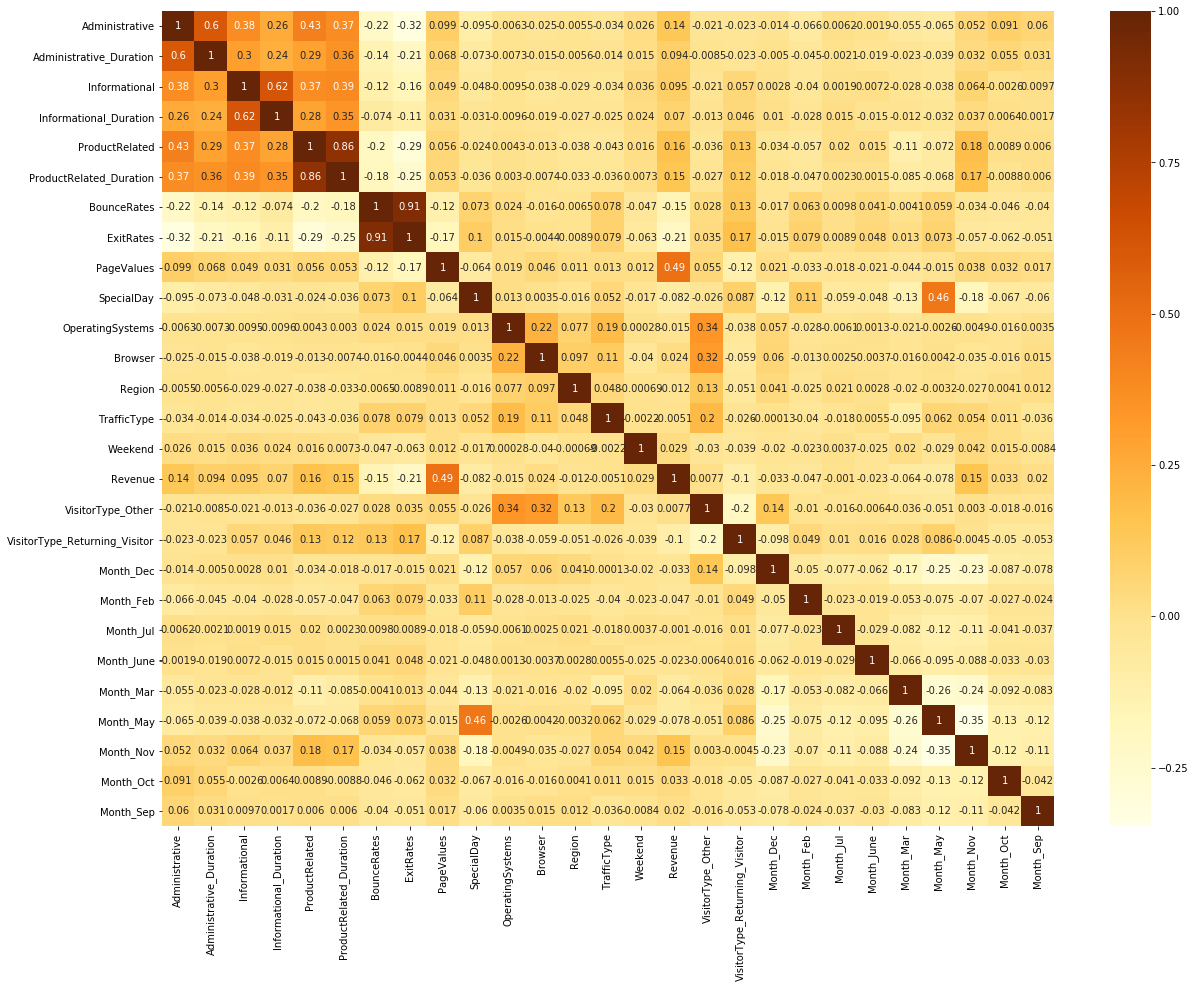

In [105]:
from matplotlib import pyplot
a4_dims = (20, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
cr = df.corr()
sns.heatmap(cr,ax = ax,annot=True,cmap = 'YlOrBr')

<b>Observation:</b>
- The target variable revenue is correlated highly with PageValues among all the features. So we can consider PageValues as the most significant feature.  
- The features Bounce rate,exit rate & product related, ProductRelated_Duration are strongly correlated with eachother respectively.So, we can opt to drop off one column in each pair.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtypes: flo

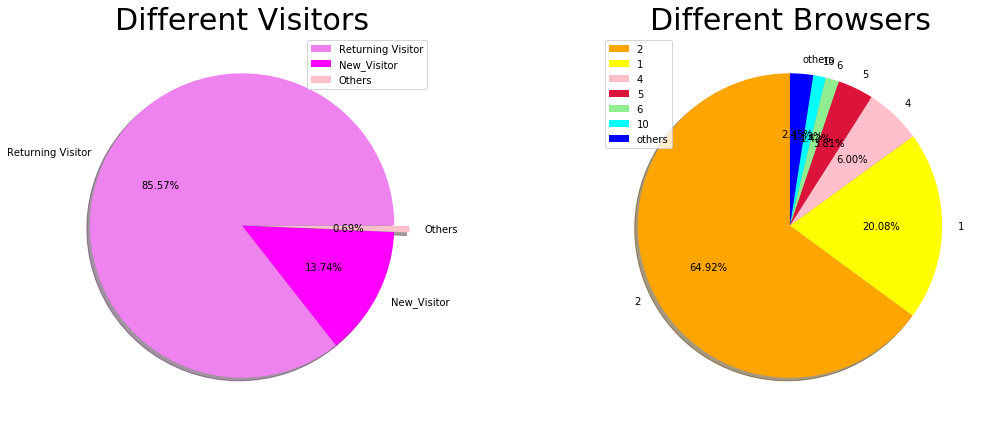

In [17]:
# plotting a pie chart for visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

## Preliminary observation

- Conversion rate of revenue column is very less. Out of ~12000 sessions only ~2000 sessions generated the revenue.
- Returning_Visitor traffic is more than the New_visitor traffic.
- This might be because the website promotion has not been proper.
- By increasing the advertisement the site will get more traffic from the new_visitor
- The Informational page is visited very rarely in each session.
- Out of 12330 sessions,In ~9500 sessions the administrative page is not visited.

## Data Preprocessing

In [18]:
categorical = ['VisitorType','Month']
df = pd.get_dummies(df,columns = categorical,drop_first=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,0,1,0,1,0,0,0,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
OperatingSystems                 12330 non-null int64
Browser                          12330 non-null int64
Region                           12330 non-null int64
TrafficType                      12330 non-null int64
Weekend                          12330 non-null int64
Revenue                          12330 non-null int64
VisitorType_O

In [20]:
X = df.drop('Revenue',axis=1)
y = df['Revenue']

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description

## Summary of Classification models

1. Pocket : In this algorithm, whenever a new row is added, the weight matrix is re-calculated and updated. This process is  iterated some  number of times to fine tune the weights. After some iterations, the weight matrix doesn't change which represents the optimal stage of the weight matrix. Sometimes, the no of iterations might be greater than the optimal stage. So, inorder to capture the optimal values of weight matrix, the best matrix values are stored and used seperately for predictions and hence the name 'Pocket' which stores the best weights.
$$
wv^{(k+1)} = wv^{(k)} + \alpha t_i xv_i
$$<br>    
    
2. QDA : QDA algorithm takes input matrices each of which belong to a seperate target value and performs operations on each of these matrices seperately. Since, we are sorting the inputs based on target values, it doesn't take target values seperately as input. It gives the likelihood of a particular record with certain features belonging to class. The target value for a record is the corresponding class for which the likelihood value is high. In this way, the class label for each record can be calculated based on the maximum likelihood class.The number of discriminants depends on the number of classes.
  
$$
\delta_k(xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

    The logarithm in the above formula is used to minimize the calculations and complexity
    
3. LDA : Linear Discriminant analysis performs similar to Quadratic Discriminant Analysis by avoiding complex calculations and ataining similar accuracy. It also helps to prevent model over fitting. This method tries to find the linear combination of features which best seperates two or more classes of examples. the resulting combination is then used as linear classifier. 
    
    $$
\delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

4. Logistic Regression: This model is similar to linear regression model. In linear regression , the output can vary over real numbers. But ,in logistic regression, tthe output values are scaled down to lie within a range. The range depends based upon the  sigmoid function we use.Based on its value in between 0 and 1, we decide the output for Classification.
    
    
$$
wv \leftarrow wv + \alpha Xm^\top \Big(  Tm - g(Xm)\Big).
$$

## Explanation of codes

1. All the four classes inherit a super class which consists of two important methods. The normalize method performs z- score normalization of an input array and the add_ones method addes a column of 1s to each and every row of the provided input matrix.

2. Pocket Algorithm : The Pocket instance is initialized with an alpha value. The train method takes the predictors matrix and target matrix and calculates the weight matrix and stores the best weight matrix in w_pocket which can further be used for predictions. The use method takes predictors matrix as input and uses the best weight matrix to make predictions.

3. QDA : The QDA train method takes the predictor matrices of seperate target classes as input and calculates the values of mu,sigma and prior probalility of each matrix seperately and stores them seperately for predictions. The use method takes the predictors as input and calcuates the discriminant matrix seperately for each class using the discriminant function. The maximum value of the discriminant class is used to determine the target label.

4. LDA: LDA works similar to QDA. The only diferrence is that , all the classes have a common sigma value.

5. Logistic Regression : The Logistic Regression contains method "softmax" which generalizes the logistic sigmoid fuunction. The 'ga' method is used to call the softmax function. The transform_target method is used to transform the target matrix to a form suitable for computations by the softmax function.

### A. Super Classs Definition

In [21]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy as copy 
%matplotlib inline

In [23]:
class Pocket(Classifier):
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
    
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T):
        Iterations = 8
        self.w = np.zeros(X.shape[1])
        self.w_pocket = copy(self.w)
        N = X.shape[0]

        for i in range(Iterations):
            converged = True
            print(i)
            for k in range(N):
                
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    ##### additional for pocket algorithm 
                    if self.compare(X, T, self.w, self.w_pocket) > 0:
                        self.w_pocket[:] = self.w[:]
                        
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
    
    def use(self,X):
        
        return (X@self.w_pocket)
        

In [24]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Pocket initialization
pocket = Pocket(0.01)
y_train=np.array(y_train)

In [27]:
pocket.train(X_train,y_train)

0
1
2
3
4
5
6
7
End of training:  7


In [28]:
# Testing with training data
predicted_target_train_pocket = pocket.use(X_train)
predicted_target_train = np.sign(predicted_target_train_pocket)

In [29]:
print('Training Data Accuracy using pocket algorithm:', accuracy_score(y_train,predicted_target_train))

Training Data Accuracy using pocket algorithm: 0.8493511759935117


In [30]:
# Testing with Test Data
predicted_target_pocket = pocket.use(X_test)
predicted_target_test = np.sign(predicted_target_pocket)
y_test = np.array(y_test)

In [31]:
print('Test Data Accuracy using Pocket Algorithm:', accuracy_score(y_test,predicted_target_test))

Test Data Accuracy using Pocket Algorithm: 0.8288726682887266


In [32]:
print('F1 score:', f1_score(y_test,predicted_target_test))

F1 score: 0.0


/Users/akhil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
conf_matrix = confusion_matrix(y_test,predicted_target_test)
conf_matrix

array([[2044,    0],
       [ 422,    0]])

In [34]:
# TP : True Positives, TN = True Negatives, FN = False Negatives, FP = False Positives
TP=conf_matrix[1][1]
TN=conf_matrix[0][0]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]

<b>Precision</b>

In [35]:
TP/(TP+FP)

/Users/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

<b>Recall</b>

In [36]:
TP/(TP+FN)

0.0

<b>Error</b>

In [37]:
(FP+FN)/(TP+FP+TN+FN)

0.1711273317112733

<b>Specificity</b>

In [38]:
TN/(TN+FP)

1.0

#### Plots for Pocket Algorithm 

Text(0, 0.5, 'Predicted value')

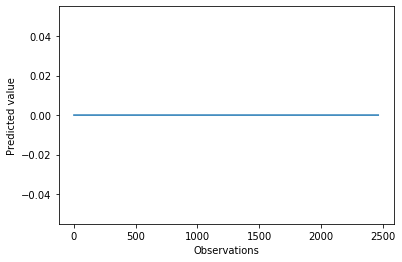

In [39]:
Y = pocket.use(X_test)
plt.plot(Y)
plt.xlabel("Observations")
plt.ylabel("Predicted value")

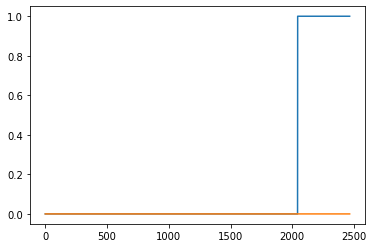

In [40]:
plt.plot(np.sort(y_test,0))
plt.plot(np.sort(predicted_target_test,0))

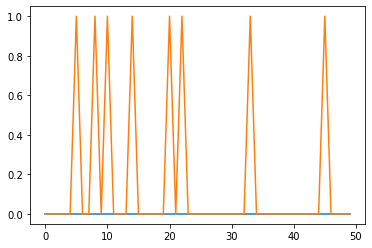

In [41]:
plt.plot(predicted_target_test[0:50])
plt.plot(y_test[0:50])

/Users/akhil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


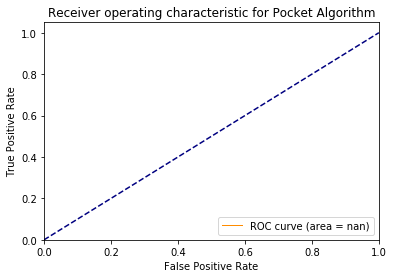

In [42]:
# AUC Curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predicted_target_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Pocket Algorithm')
plt.legend(loc="lower right")
plt.show()

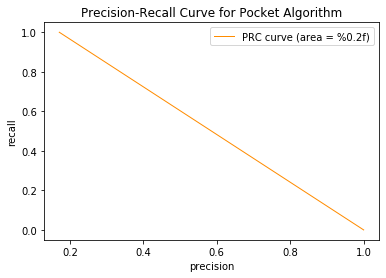

In [43]:
# Precision-Recall Curve 
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted_target_test)
plt.figure()
plt.plot(precision, recall, color='darkorange', lw=1, label='PRC curve (area = %0.2f)')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision-Recall Curve for Pocket Algorithm')
plt.legend(loc="upper right")
plt.show()

### C. QDA

In [106]:
class QDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        
    def discriminant(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
    
    
    def train(self,X1,X2):
        X1=pd.DataFrame(X1)
        X2=pd.DataFrame(X2)
        Temp1 = X1.shape[0]
        Temp2 = X2.shape[0]
        self.mu1 = np.mean(X1,0)
        self.mu2 = np.mean(X2,0)
        
        self.sigma1 = np.cov(X1.T)
        self.sigma2 = np.cov(X2.T)
        
        self.prior1 = Temp1/(Temp1+Temp2)
        self.prior2 = Temp2/(Temp1+Temp2)
        
    def use(self,X):
        X = self.normalize(X)
        result1 = self.discriminant(X,np.matrix(self.mu1),self.sigma1,self.prior1)
        result2 = self.discriminant(X,np.matrix(self.mu2),self.sigma2,self.prior2)
        return result1,result2
        

In [107]:
# Testing and Training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=45)

In [108]:
qda = QDA()
# Normalizing Training data
X_train_norm = qda.normalize(X_train)
# Filtering Training records based on Target Labels (0,1)
X_class1 = X_train_norm[y_train==0]
X_class2 = X_train_norm[y_train==1]

In [109]:
# Applying Training Data to train the QDA model
qda.train(X_class1,X_class2)

In [110]:
# Testing with Training Data
t1,t2 = qda.use(X_train)
pred_train=[]
for i in range(t1.size):
    if t1[i] > t2[i]:
        pred_train.append(0)
    else:
        pred_train.append(1)

pred_train = np.array(pred_train)
true_train = np.array(y_train)

In [111]:
print('Training Data Accuracy:', accuracy_score(true_train,pred_train))

Training Data Accuracy: 0.7738577994052447


In [112]:
# Testing with Test Data
p1,p2 = qda.use(X_test)

In [113]:
pred_test=[]
for i in range(p1.size):
    if p1[i] > p2[i]:
        pred_test.append(0)
    else:
        pred_test.append(1)

pred_test = np.array(pred_test)
true_test = np.array(y_test)

In [114]:
print('Accuracy:', accuracy_score(true_test,pred_test))

Accuracy: 0.7656123276561233


In [115]:
print('F1 score:', f1_score(true_test,pred_test))

F1 score: 0.49519650655021835


In [116]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_test,pred_test)
conf_matrix

array([[3209,  950],
       [ 206,  567]])

In [117]:
# TP : True Positives, TN = True Negatives, FN = False Negatives, FP = False Positives
TP=conf_matrix[1][1]
TN=conf_matrix[0][0]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]

<b>Precision</b>

In [118]:
TP/(TP+FP)

0.37376400791034936

<b>Recall</b>

In [57]:
TP/(TP+FN)

0.7335058214747736

<b>Error</b>

In [58]:
(FP+FN)/(TP+FP+TN+FN)

0.23438767234387672

<b>Specificity</b>

In [59]:
TN/(TN+FP)

0.7715797066602549

## Plots for QDA

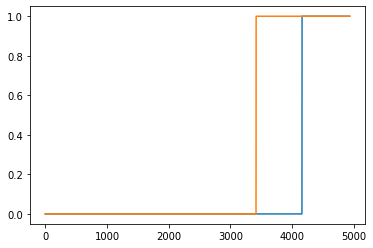

In [60]:
plt.plot(np.sort(true_test,0))
plt.plot(np.sort(pred_test,0))

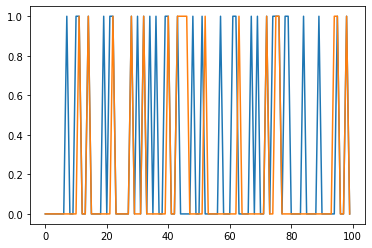

In [61]:
plt.plot(pred_test[0:100])
plt.plot(true_test[0:100])

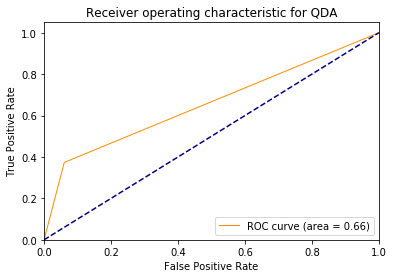

In [62]:
# AUC Curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, true_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for QDA')
plt.legend(loc="lower right")
plt.show()

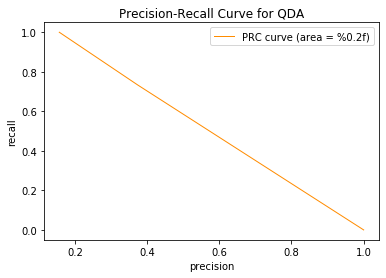

In [63]:
# Precision-Recall Curve 
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(true_test, pred_test)
plt.figure()
plt.plot(precision, recall, color='darkorange', lw=1, label='PRC curve (area = %0.2f)')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision-Recall Curve for QDA')
plt.legend(loc="upper right")
plt.show()

Text(0.5, 0.92, 'QDA Discriminant Functions')

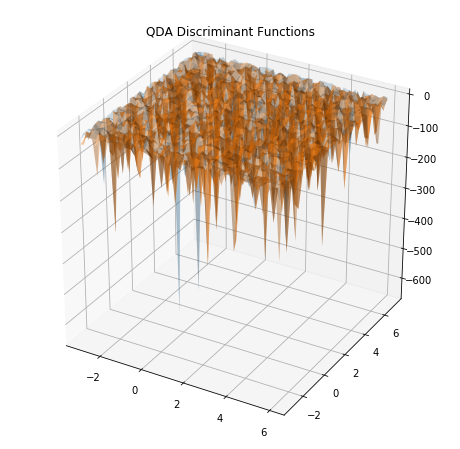

In [64]:
# QDA Discriminant Functions
pp1,pp2 = qda.use(X_test[0:2500])
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-3,6, 50), np.linspace(-3,7, 50))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, pp1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, pp2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")


Text(0.5, 1.0, 'Decision Boundary')

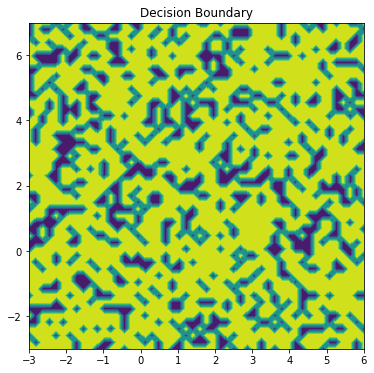

In [65]:
# Decision Boundary for QDA
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (pp1-pp2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")

### D. LDA

In [119]:
class LDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
    
    def discriminant(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                      - 0.5 * np.dot(mu, sigma_inv) * mu \
                      + np.log(prior), axis=1)
    
    
    def train(self,X1,X2):
              
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2,0)
        
        X = np.vstack((X1,X2))
        self.sigma = np.cov(X.T)
        
        self.prior1 = N1/(N1+N2)
        self.prior2 = N2/(N1+N2)
    
    def use(self,X):
        X = self.normalize(X)
        result1 = self.discriminant(X,self.mu1,self.sigma,self.prior1)
        result2 = self.discriminant(X,self.mu2,self.sigma,self.prior2)
        return result1,result2
    
    
        
    

In [120]:
# Testing and Training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [121]:
lda = LDA()
# Normalizing the Training data
X_norm = lda.normalize(X_train)
# Filtering Training records based on Target Labels (0,1)
X_class1_lda = X_norm[y_train==0]
X_class2_lda = X_norm[y_train==1]

In [122]:
# Applying Training Data to train the LDA model
lda.train(X_class1_lda,X_class2_lda)

In [123]:
# Testing with Training Data
c1,c2 = lda.use(X_train)
p2=[]
for i in range(c1.size):
    if c1[i] > c2[i]:
        p2.append(0)
    else:
        p2.append(1)

pred_train = np.array(p2)
true_train = np.array(y_train)

In [124]:
print(' Training Data Accuracy:', accuracy_score(true_train,pred_train))

 Training Data Accuracy: 0.8452091298806628


In [125]:
# Testing with test data
d1,d2 = lda.use(X_test)
p2=[]
for i in range(d1.size):
    if d1[i] > d2[i]:
        p2.append(0)
    else:
        p2.append(1)

pred_test2 = np.array(p2)
true_test2 = np.array(y_test)

In [126]:
print(' Test Data Accuracy:', accuracy_score(true_test2,pred_test2))

 Test Data Accuracy: 0.8453636117869695


In [127]:
print('F1 score:', f1_score(true_test2,pred_test2))

F1 score: 0.0


/Users/akhil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [128]:
# Confusion matrix
conf_matrix = confusion_matrix(true_test2,pred_test2)
conf_matrix

array([[3127,    0],
       [ 572,    0]])

In [129]:
# TP : True Positives, TN = True Negatives, FN = False Negatives, FP = False Positives
TP=conf_matrix[1][1]
TN=conf_matrix[0][0]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]

<b>Precision</b>

In [130]:
TP/(TP+FP)

/Users/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

<b>Recall</b>

In [131]:
TP/(TP+FN)

0.0

<b>Error</b>

In [132]:
(FP+FN)/(TP+FP+TN+FN)

0.15463638821303055

<b>Specificity</b>

In [133]:
TN/(TN+FP)

1.0

## Plots for LDA

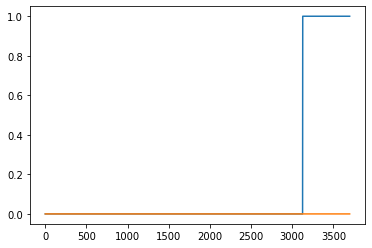

In [134]:
plt.plot(np.sort(true_test2,0))
plt.plot(np.sort(pred_test2,0))

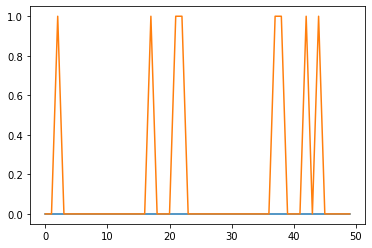

In [135]:
plt.plot(pred_test2[0:50])
plt.plot(true_test2[0:50])

Text(0.5, 0.92, 'LDA Discriminant Functions')

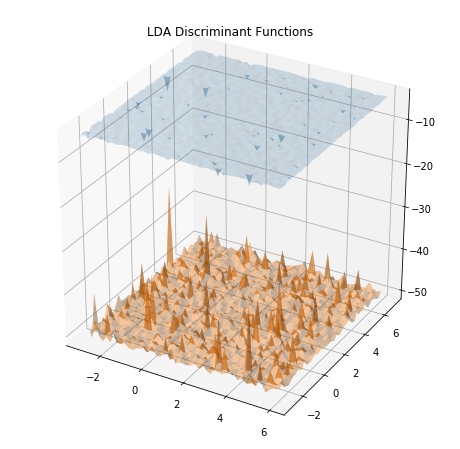

In [136]:
# LDA Discriminant Functions
pp1,pp2 = lda.use(X_test[0:2500])
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-3,6, 50), np.linspace(-3,7, 50))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, pp1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, pp2.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 0, 'LDA P(x|Class=k)\n from disc funcs')

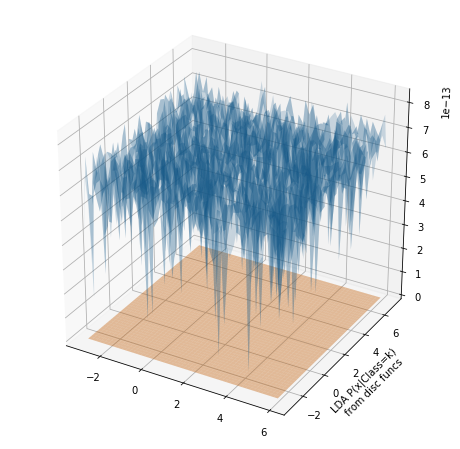

In [137]:
# LDA P(x|Class=k)\n from disc funcs
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( pp1.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(lda.prior1))
prob2 = np.exp( pp2.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(lda.prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("LDA P(x|Class=k)\n from disc funcs", multialignment="center")


### E. Logistic Regression

In [85]:
class LogReg(Classifier):
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z)
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def g(self,X, w):
        return self.softmax(X @ w)
    
    def transform_target(self,X):
        if not isinstance(X, np.ndarray):
            X = np.asarray(X)
        
        class1 = []
        class2 = []
        a = pd.DataFrame()
        
        for i in range(X.shape[0]):
            if X[i] == 0:
                class1.append(1)
                class2.append(0)
            else:
                class1.append(0)
                class2.append(1)
        
        a['0'] = class1
        a['1'] = class2
        return np.asarray(a)
    
    def train(self,X,T):
        N = X.shape[0]
        D = X.shape[1]
        K = 2
        niter = 10
        self.w = np.zeros((D+1, K))
        T2 = self.transform_target(T)
        Xn = self.normalize(X)
        X1 = self.add_ones(Xn)
        
        for step in range(niter):
            ys = self.g(X1, self.w)
            self.w += self.alpha * X1.T @ (T2 - ys)
    
    
    def use(self,X):
        Xn=self.normalize(X)
        X1s=self.add_ones(Xn)
        return self.g(X1s, self.w)

In [86]:
# Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [87]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
logreg = LogReg(0.0000001)
# Applying Training Data to train the Logistic Regression model
logreg.train(X_train,y_train)

In [89]:
# Testing with Training Data
pred_train = logreg.use(X_train)
tclass1 =  pred_train[:,0]
tclass2 = pred_train[:,1]
predictions_logreg = []
for i in range(tclass1.shape[0]):
    if tclass1[i] > tclass2[i]:
        predictions_logreg.append(0)
    else:
        predictions_logreg.append(1)
predictions_logreg_t = np.array(predictions_logreg)
trueYvalues_t = np.array(y_train)

In [90]:
print(' Training Data Accuracy:', accuracy_score(trueYvalues_t,predictions_logreg_t))

 Training Data Accuracy: 0.8558683814158267


In [91]:
# Testing with Test Data
predictors_logreg = logreg.use(X_test)
class1 = predictors_logreg[:,0]
class2 = predictors_logreg[:,1]
predictions_logreg = []
for i in range(class1.shape[0]):
    if class1[i] > class2[i]:
        predictions_logreg.append(0)
    else:
        predictions_logreg.append(1)
predictions_logreg = np.array(predictions_logreg)
trueYvalues = np.array(y_test)

In [92]:
print('Test Data Accuracy:', accuracy_score(trueYvalues,predictions_logreg))

Test Data Accuracy: 0.8529332251959989


In [93]:
print('F1 score:', f1_score(trueYvalues,predictions_logreg))

F1 score: 0.49063670411985016


In [94]:
# Confusion Matrix
conf_matrix = confusion_matrix(trueYvalues,predictions_logreg)
conf_matrix

array([[2893,  234],
       [ 310,  262]])

In [95]:
# TP : True Positives, TN = True Negatives, FN = False Negatives, FP = False Positives
TP=conf_matrix[1][1]
TN=conf_matrix[0][0]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]

<b>Precision</b>

In [96]:
TP/(TP+FP)

0.5282258064516129

<b>Recall</b>

In [97]:
TP/(TP+FN)

0.458041958041958

<b>Error</b>

In [98]:
(FP+FN)/(TP+FP+TN+FN)

0.14706677480400107

<b>Specificity</b>

In [99]:
TN/(TN+FP)

0.9251678925487687

## Plots for logistic regression

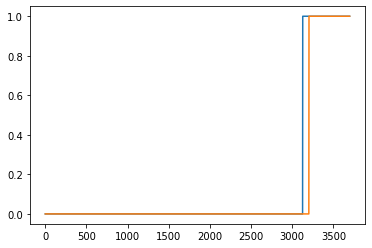

In [100]:
plt.plot(np.sort(trueYvalues,0))
plt.plot(np.sort(predictions_logreg,0))

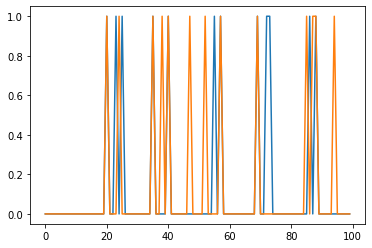

In [101]:
plt.plot(predictions_logreg[0:100])
plt.plot(trueYvalues[0:100])

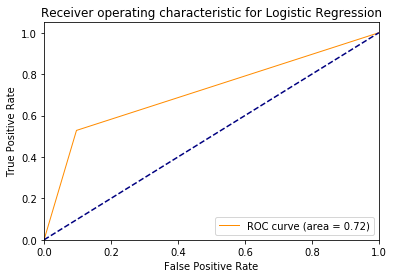

In [102]:
# AUC Curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predictions_logreg, trueYvalues)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

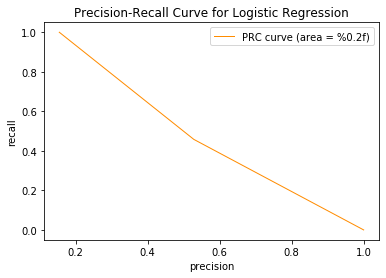

In [103]:
# Precision-Recall Curve for Logistic Regression
precision, recall, thresholds = precision_recall_curve(trueYvalues, predictions_logreg)
plt.figure()
plt.plot(precision, recall, color='darkorange', lw=1, label='PRC curve (area = %0.2f)')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc="upper right")
plt.show()

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

## Discussion about evaluation metrics

1. When there are different classes as output of these algorithms, accuracy alone cannot be used to compare the performance of the models.
2. To compare the correctness of positive classes of classification, precision can be used. Precision is defined as the ratio of True positives to the sum of True Positives and False Positives.
3. To compare the correctness of classification of positive class with actual positive class, recall can be used. For binary classification problems, recall is same as sensitivity. Recall is defined as the ratio of True Positives to the sum of True positives and False Negatives.
4. To find out the correctness of negative classes, specificity can be used. Specificity is defined as the ratio of True Negatives to the sum of True Negatives and False Positives.
5. Area Under Curve (AUC curve) can be used to plot a graph of False Positives and True Positives.
6. Precision-Recall curve can be used to plot a graph comparing precision and recall of a model. 
7. F1 score can also be used to convey the balance between precision and recall.

## Discussion about Train and Test Accuracies

1. Accuracy alone cannot be used to determine the performance of model because of the presence of different classes.
2. From the accuracies, we can conclude that none of the models underfit the data.
3. Since Precall and Recall are much lesser, accuracy alone cannot be used to determine the model's performance.
4. F1 Score and Specificity can be used along with accuracy to measure the performance of the model.
5. The F1 score and specificity for logistic regression is high when compared with other models, so logistic regression is better fit for our datamodel.

## Discussions about classification model comparision

<b>Pocket Algorithm:</b>  
  
Training Accuracy : 84.9%    
Test Accuracy : 82.8%    
F1 Score : 0.0    
Precision : nan     
Recall : 0.0    
Error : 0.171    
Specificity : 1  
  
<b>QDA Algorithm:</b>  
  
Training Accuracy : 77.3%    
Test Accuracy : 76.5%    
F1 Score : 0.495     
Precision : 0.373      
Recall : 0.733      
Error : 0.234      
Specificity : 0.771       
   
<b>LDA Algorithm:</b>  
  
Training Accuracy : 84.5%    
Test Accuracy : 84.5%    
F1 Score : 0  
Precision : nan  
Recall : 0  
Error : 0.154    
Specificity : 1  
  
  
<b>Logistic Regression Algorithm:</b>
  
Training Accuracy : 85.4%    
Test Accuracy : 85.2%     
F1 Score : 0.49    
Precision : 0.524   
Recall : 0.458      
Error : 0.147    
Specificity : 0.925     

The F1 Score of Pocket & LDA is 0 which indicates that it is classifying all the recods as negative which further can be confirmed by values of recall and specificity. But its accuracy is >80% because it classifies all the records as negative which consitute >80% of the data. So, Pocket & LDA overfits the training data and performs poorly on the test data.

# Conclusions

1. We cannot rely on accuracy in this scenario since we have a skewed class. we should rely on attributes such as precision, recall, F1 score, Area under the curve etc. Even if we classify every case as a negative class, we can get a good accuracy. This scenaria is clearly understood from the LDA model.
3. The dataset needs to be balanced for more efficient results which can be done by adding some positive case records (scaling up) or by removing negative case records (scaling down).
4. The Pocket & LDA model overfits the data and fails to classify the positive records.It can be concluded that this model is sensitive to unbalanced datasets than compared to other models. So, these algorithms perform poorly on my dataset.

# References

1. Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018)
2. https://fsocietysj.com/prediction-of-online-shoppers-intention/  
3. https://www.kaggle.com/roshansharma/online-shopper-s-intention
4. https://docs.scipy.org/doc/numpy
5. https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)